In [231]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from tensorflow.keras import optimizers
import warnings
warnings.filterwarnings('ignore') 

In [3]:
train_path = "Dataset/training_set"
test_path = "Dataset/test_set" 

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
training_set = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=32, class_mode='binary')
testing_set = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=32, class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [17]:
model = Sequential()

In [19]:
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,679,041 (36.92 MB)

 Trainable params: 9,679,041 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-3), metrics=['accuracy'])

In [25]:
history = model.fit(training_set,steps_per_epoch=training_set.samples//20,epochs=10,validation_data=testing_set,validation_steps=testing_set.samples//20)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 290s 720ms/step - accuracy: 0.5165 - loss: 0.7447 - val_accuracy: 0.5000 - val_loss: 0.7370
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 307s 766ms/step - accuracy: 0.5695 - loss: 0.6830 - val_accuracy: 0.6925 - val_loss: 0.6156
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 307s 767ms/step - accuracy: 0.6241 - loss: 0.6434 - val_accuracy: 0.6315 - val_loss: 0.6603
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 290s 723ms/step - accuracy: 0.6451 - loss: 0.6223 - val_accuracy: 0.5915 - val_loss: 0.6578
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 308s 770ms/step - accuracy: 0.6757 - loss: 0.5996 - val_accuracy: 0.7225 - val_loss: 0.5306
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 312s 778ms/step - accuracy: 0.6981 - loss: 0.5772 - val_accuracy: 0.6920 - val_loss: 0.5749
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 313s 782ms/step - accuracy: 0.7084 - loss: 0.5624 - val_accuracy: 0.7620 - val_loss: 0.4950
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 297s 741ms/step - accuracy: 0.7279 -

In [29]:
history.history

{'accuracy': [0.5251250267028809,
  0.581250011920929,
  0.6326249837875366,
  0.6496250033378601,
  0.6756250262260437,
  0.6937500238418579,
  0.7168750166893005,
  0.7276250123977661,
  0.7387499809265137,
  0.7534999847412109],
 'loss': [0.7089704275131226,
  0.676476240158081,
  0.636001467704773,
  0.6201176047325134,
  0.5972146391868591,
  0.579085111618042,
  0.5528655648231506,
  0.5382211804389954,
  0.5250647664070129,
  0.5090599656105042],
 'val_accuracy': [0.5,
  0.6924999952316284,
  0.6315000057220459,
  0.5914999842643738,
  0.7225000262260437,
  0.6919999718666077,
  0.7620000243186951,
  0.7609999775886536,
  0.7894999980926514,
  0.7929999828338623],
 'val_loss': [0.7369764447212219,
  0.6155581474304199,
  0.660254716873169,
  0.6577970385551453,
  0.5305677056312561,
  0.5749298334121704,
  0.4949672222137451,
  0.485285222530365,
  0.43759775161743164,
  0.4353998601436615]}

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
testing_set.classes

array([0, 0, 0, ..., 1, 1, 1])

In [53]:
loss, accuracy = model.evaluate(testing_set)
print(f'Accuracy: {accuracy*100:.2f}%')

63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.7914 - loss: 0.4315
Accuracy: 79.30%


In [55]:
y_pred = model.predict(testing_set)
y_pred_classes = (y_pred > 0.5).astype(int)

#True labels 0 = dogs & 1 = cats
y_true = testing_set.classes

# Classification report
class_report = classification_report(y_true, y_pred_classes)
print(f"Classification Report: \n{class_report}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 292ms/step
Classification Report: 
              precision    recall  f1-score   support

           0       0.49      0.46      0.48      1000
           1       0.50      0.53      0.51      1000

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
path ='Dataset/test_set/dogs/dog.4020.jpg'
img = image.load_img(path,target_size=(224,224))
plt.imshow(img)
plt.axis('off')
plt.show()

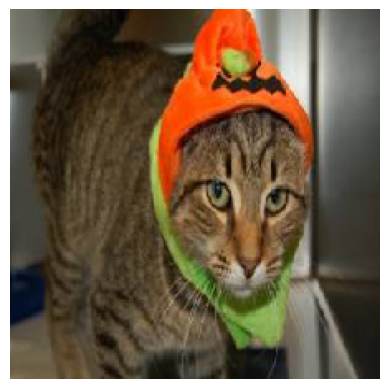

In [219]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
path ='Dataset/test_set/cats/cat.4119.jpg'
img = image.load_img(path,target_size=(224,224))
plt.imshow(img)
plt.axis('off')
plt.show()

In [61]:
import numpy as np

In [221]:
# Convert and preprocess
img_array = np.array(img) / 255.0  # Normalize to [0, 1]
img_array = img_array.reshape(1, 224, 224, 3)

# Predict
a = model.predict(img_array)
print(f"Raw prediction: {a}")

# Threshold decision
if a[0][0] < 0.5:
    print("Predicted: Dog (class 0)")
else:
    print("Predicted: Cat (class 1)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Raw prediction: [[0.6124845]]
Predicted: Cat (class 1)
